## MAIZSIM simulation cases

Analyzing 4 MAIZSIM simulation outcomes for a closer look at potential issues with model code and simualtion output

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

### Parameter perturbation
A set of 100 parameter combinations was created through a Latin Hypercube sampling method. <br/>
The cases investigated here include simulations with parameters from cultivar 0, 1, 3, & 30.

In [127]:
df_params = pd.read_csv('/home/disk/eos8/ach315/upscale/inits/param_100.csv')
df_params = df_params.iloc[[0,1,3,30], :]
df_params.index = ['var1','var0','var3','var30']
df_params

,staygreen,rmax_lir,rmax_ltar,juv_leaves,leaf_wid,WLRATIO,A_LW,LAF,f,scatt,vcm_25,vpm_25,g0,g1,t_opt,psi_threshold
var1,4.192327,0.170936,1.116221,19,0.060117,1.578166,0.578437,1.082704,0.374039,0.799075,41.453395,63.020343,0.050014,4.262101,23.156285,-3.209627
var0,5.085099,0.458642,0.532489,13,0.053712,1.593230,0.944650,2.500608,0.084047,0.638286,55.254491,76.360963,0.045041,9.476365,21.452484,-4.528151
var3,2.468920,0.159873,0.209975,14,0.021548,1.951003,0.603160,1.430029,0.198690,0.216546,53.057031,71.797256,0.102321,3.169339,26.865773,-3.101738
var30,4.308304,0.113473,0.900777,18,0.024615,1.171935,0.607410,2.061111,0.180131,0.052547,54.826520,73.040447,0.112302,1.608984,27.633592,-2.744836


### Case 1: run_03820_1961_var_1.txt
Location: 03830 <br/>
Yar: 1961 <br/>
Cultivar: 1 <br/>
Example of successful simulation! <br/>

In [138]:
# setting column name for reading in model output
cols = ['jday', 'time', 
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI', 
        'RH', 'leaf_WP', 'PFD', 'solrad', 'temp_soil', 'temp_air', 'temp_can', 'ET_dmd', 'ET_suply',
        'Pn', 'Pg', 'resp', 'av_gs', 'LAI_sunlit', 'LAI_shaded', 'PFD_sunlit', 'PFD_shaded', 
        'An_sunlit', 'An_shaded', 'Ag_sunlit', 'Ag_shaded', 'gs_sunlit', 'gs_shaded', 'VPD',
        'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL', 'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf', 'dm_dropleaf', 
        'df_stem', 'df_root', 'roil_rt', 'mx_rootdept', 'available_water', 'soluble_c', 'note']

In [144]:
df = pd.read_csv('/home/disk/eos8/ach315/upscale/sims/opt/1961/var_1/out1_03820_1961_var_1.txt')
df.columns = cols
df.note = [i.strip() for i in df.note]
df.tail()

,jday,time,leaves,mature_lvs,drop_lvs,LA,LA_dead,LAI,RH,leaf_WP,...,dm_ear,dm_totleaf,dm_dropleaf,df_stem,df_root,roil_rt,mx_rootdept,available_water,soluble_c,note
08/02/1961,22495,7,13.0,13,12,0.15,2619.08,0.0,96.32,-1.5,...,30.06,5.46,4.84,7.74,66.669,66.817,0.0,0.0,0.08,"""Matured"""
08/02/1961,22495,8,13.0,13,12,0.06,2619.17,0.0,90.03,-1.5,...,30.06,5.46,4.84,7.74,66.669,66.817,0.0,0.0,0.09,"""Matured"""
08/02/1961,22495,9,13.0,13,12,0.01,2619.22,0.0,84.16,-1.5,...,30.06,5.46,4.84,7.75,66.669,66.817,0.0,0.0,0.09,"""Matured"""
08/02/1961,22495,10,13.0,13,12,0.00,2619.23,0.0,68.88,-1.5,...,30.06,5.46,4.84,7.75,66.669,66.817,0.0,0.0,0.09,"""Matured"""
08/02/1961,22495,11,13.0,13,13,0.00,2619.23,0.0,67.05,-1.5,...,30.06,5.46,5.46,7.75,66.669,66.817,0.0,0.0,0.10,"""Matured"""


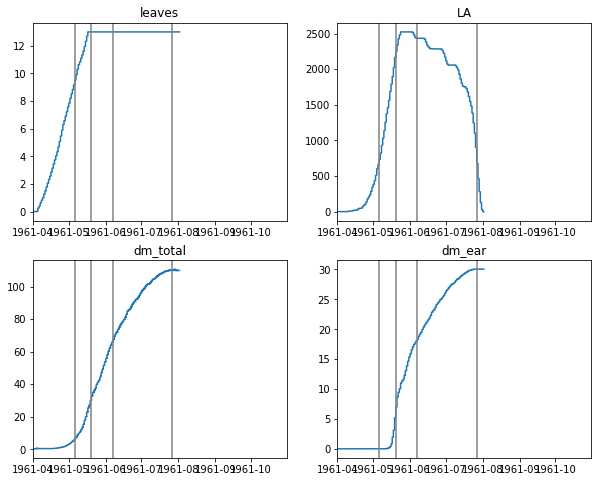

In [145]:
outputs = ['leaves', 'LA', 'dm_total', 'dm_ear']
dates = []
for i in df.index:
    dates.append(datetime.datetime.strptime(i, '%m/%d/%Y'))

fig, axs = plt.subplots(2, 2, figsize=(10,8))
for ax, i in zip(axs.flatten(), outputs):
    ax.plot(dates, df[i])
    ax.set_title(i)
    ax.set_xlim(datetime.datetime(1961,4,1), datetime.datetime(1961,10,31))
    ax.axvline(datetime.datetime(1961,5,6), color='grey') # Tasselinit
    ax.axvline(datetime.datetime(1961,5,20), color='grey') # Tasseled
    ax.axvline(datetime.datetime(1961,6,7), color='grey') # grainFill
    ax.axvline(datetime.datetime(1961,7,27), color='grey') # Matured

### Case 2: run_03820_1961_var_0.txt
Location: 03830 <br/>
Yar: 1961 <br/>
Cultivar: 0 <br/>

#### Issues:
- 'Matured' between 'Emergence' & 'Tassel initiation'
- pheno stage in model output misses reproductive pheno stages other than 'Matured'
- model did not reach grain filling - last terminal output pheno stage 'Silking' 
- total biomass started crashing towards the end
- no final yield - ear biomass 0

#### Potential causes:
- GDD requirements reached prior to other reproductive stages
    - while I don't think this actually affects the model, it leads to bad model output that miss information on other reproductive pheno stages pheno stages (maksed by mature)
- All leaves have appeared prior to tassel initiation
    - Normally, the action for more leaves to appear will occur only if LvsAppeared < (int)LvsInitiated. If LvsAppeared after this timestep ends up being greater than (int)LvsInitiated, then LvsAppeared is set to equal LvsInitiated. However, once tassel initiation occurs, the # of initiated leaves is round down to an integer number through code LvsInitiated = (int)LvsInitiated.
    - At this point, it's possible for LvsAppeared to end up being slightly higher than LvsInitiated.
    - This creates an issue when calculating 'scale' in plant.cpp:
        - scale = develop->get_phyllochronsFromTI()/(develop->get_youngestLeaf() - develop->get_LvsAtTI());
        - youngestLeaf at this point equals to LvsInitiated and LvsAtTI equal to LvsAppeared
        - This returns a negative value to scale if LvsAppeared is greater than LvsInitiaed
    - A negative scale value further leads to a negative value for "Fraction"
        - Fraction = __min(0.925, 0.50 + 0.50*scale);
    - I'm not sure if both scale and Fraction were only intended to be positive values (I think it was?), but I did notice that negative scale & Fraction values lead to rapid drops in biomass after tassel initiation, which doesn't seem to be the original intension. 
    - This also often leads to issues with final partitioning towards the ear, resulting in no final yield for the simulated plant.
- model also never reached grain filling stage
    - likely that all leaves senesced prior to grain filling, so no final grain yield. 
    
#### Potential contribution from parameters:
- high leaf tip appearance rate and/or
- low juvenile leaf number

In [141]:
# reading in model output
df = pd.read_csv('/home/disk/eos8/ach315/upscale/sims/opt/1961/var_0/out1_03820_1961_var_0.txt')
df.columns = cols
df.note = [i.strip() for i in df.note]
df.head()

,jday,time,leaves,mature_lvs,drop_lvs,LA,LA_dead,LAI,RH,leaf_WP,...,dm_ear,dm_totleaf,dm_dropleaf,df_stem,df_root,roil_rt,mx_rootdept,available_water,soluble_c,note
04/01/1961,22372,0,0.0,0,0,0.0,0.0,0.0,93.14,-0.05,...,0.0,0.15,0.0,0.02,0.11,0.0,0.0,0.0,0.0,"""none"""
04/01/1961,22372,1,0.0,0,0,0.0,0.0,0.0,93.14,-0.05,...,0.0,0.15,0.0,0.02,0.11,0.0,0.0,0.0,0.0,"""none"""
04/01/1961,22372,2,0.0,0,0,0.0,0.0,0.0,89.51,-0.05,...,0.0,0.15,0.0,0.02,0.11,0.0,0.0,0.0,0.0,"""none"""
04/01/1961,22372,3,0.0,0,0,0.0,0.0,0.0,89.99,-0.05,...,0.0,0.15,0.0,0.02,0.11,0.0,0.0,0.0,0.0,"""none"""
04/01/1961,22372,4,0.0,0,0,0.0,0.0,0.0,80.27,-0.05,...,0.0,0.15,0.0,0.02,0.11,0.0,0.0,0.0,0.0,"""none"""


In [142]:
set(df.note) # can see here that "Matured" is the only reproductive pheno stage that got recorded

{'"Emerged"', '"Germinated"', '"Matured"', '"none"'}

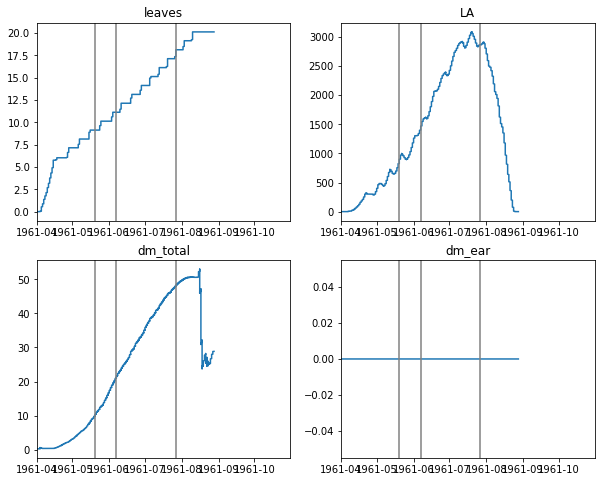

In [143]:
outputs = ['leaves', 'LA', 'dm_total', 'dm_ear']
dates = []
for i in df.index:
    dates.append(datetime.datetime.strptime(i, '%m/%d/%Y'))

fig, axs = plt.subplots(2, 2, figsize=(10,8))
for ax, i in zip(axs.flatten(), outputs):
    ax.plot(dates, df[i])
    ax.set_title(i)
    ax.set_xlim(datetime.datetime(1961,4,1), datetime.datetime(1961,10,31))
    ax.axvline(datetime.datetime(1961,5,20), color='grey') # mature
    ax.axvline(datetime.datetime(1961,6,7), color='grey') # 
    ax.axvline(datetime.datetime(1961,7,27), color='grey') # 

### Case 3: run_03820_1961_var_3.txt
Location: 03830 <br/>
Yar: 1961 <br/>
Cultivar: 3 <br/>

#### Issues:
- reached 'Physiological maturity' (instead of 'Matured') but skipped thorugh many stages
- simualtion ended very early in the season (4/14) - model barely ran, no leaf growth, very little biomass, no yield

#### Potential causes:
- plant emerged prior to any leaves appeared
- this triggered "physiological maturity" since green leaf area <= 0.05 leaf area (which both were actually just 0) prior to maturity, and triggered maturity and death
- simulation ended really early

#### Potential contribution from parameters:
- likely due to low leaf tip appearance rate
- maybe also warmer cliamte that contributed to early emergence

In [146]:
df = pd.read_csv('/home/disk/eos8/ach315/upscale/sims/opt/1961/var_3/out1_03820_1961_var_3.txt')
df.columns = cols
df.note = [i.strip() for i in df.note]
df.tail()

,jday,time,leaves,mature_lvs,drop_lvs,LA,LA_dead,LAI,RH,leaf_WP,...,dm_ear,dm_totleaf,dm_dropleaf,df_stem,df_root,roil_rt,mx_rootdept,available_water,soluble_c,note
04/14/1961,22385,13,0.85,0,0,0.0,0.0,0.0,36.87,-0.05,...,0.0,0.22,0.0,0.03,0.11,0.115,0.0,0.0,0.0,"""Germinated"""
04/14/1961,22385,14,0.86,0,0,0.0,0.0,0.0,32.99,-0.05,...,0.0,0.22,0.0,0.03,0.11,0.115,0.0,0.0,0.0,"""Germinated"""
04/14/1961,22385,15,0.87,0,0,0.0,0.0,0.0,33.51,-0.05,...,0.0,0.22,0.0,0.03,0.11,0.115,0.0,0.0,0.0,"""Germinated"""
04/14/1961,22385,16,0.88,0,0,0.0,0.0,0.0,34.85,-0.05,...,0.0,0.22,0.0,0.03,0.11,0.115,0.0,0.0,0.0,"""Germinated"""
04/14/1961,22385,17,0.89,0,0,0.0,0.0,0.0,32.41,-0.05,...,0.0,0.22,0.0,0.03,0.11,0.115,0.0,0.0,0.0,"""Matured"""


In [147]:
set(df.note) # plant only experienced two phenostages

{'"Germinated"', '"Matured"', '"none"'}

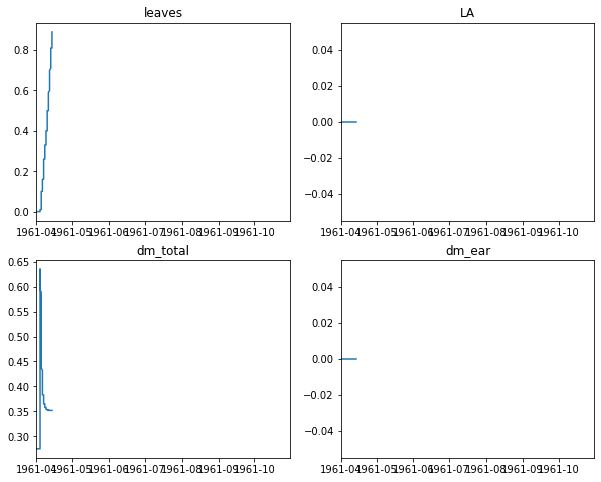

In [148]:
outputs = ['leaves', 'LA', 'dm_total', 'dm_ear']
dates = []
for i in df.index:
    dates.append(datetime.datetime.strptime(i, '%m/%d/%Y'))

fig, axs = plt.subplots(2, 2, figsize=(10,8))
for ax, i in zip(axs.flatten(), outputs):
    ax.plot(dates, df[i])
    ax.set_title(i)
    ax.set_xlim(datetime.datetime(1961,4,1), datetime.datetime(1961,10,31))

### Case 4: run_12912_1990_var_30.txt
Location: 03830 <br/>
Yar: 1990 <br/>
Cultivar: 30 <br/>

#### Issues:
- 'Matued' between 'Emergence' & 'Tassel initiation'
- drop in biomass around tassel initiation
- no final yield
- ended with 'Fortran runtime error: End of file
- issue seems to be with hourwea.for, line 304

#### Potential causes:
- Matured prior to other reproductive pheno stages
- Total green leaf area reached 0 (all leaves have senesced) prior to tassel initiation
- This caused N_effect to become NaN
    - Since plant has not yet reached the tassel initiation stage, ;leaf initiation and appearance are still happening, but at this point all leaves have senesced. This leads to issue when trying to calculate leaf_N_content in plant.cpp:
    - leaf_N_content = leaf_N/(this->greenLeafArea/10000)
    - since greenLeafArea = 0 now, leaf_N_content returns a NaN
    - This NaN value further leads to issues when calcualting N_effect, which further affects several other things such as: 
        - area
        - seneDuration
        - seneAge
        - senescentArea
- This not only directly affects green leaf area calculation but also affects the phenological stage coding for individual leaves. Specifically, Aging & Death will not be triggered once N_content becomes NaN
- Eventually, the overall death of the plant will not be triggered, even when all leaves have appeared and senesced - the model keeps running and reaches the end of the weather file and throws an error. 
- N also got depleted in this simulation - this doesn't really mess up the whole simulation, rather, there can no longer be any leaf area gain since N_effect is now 0 (this is before the N_effect became NaN). This point on, plant only senesces. I want to avoid any issues with N stress, so will need to further look into if there are ways to avoid this.

In [149]:
df = pd.read_csv('/home/disk/eos8/ach315/upscale/sims/opt/1990/var_30/out1_12912_1990_var_30.txt')
df.columns = cols
df.note = [i.strip() for i in df.note]
df.tail()

,jday,time,leaves,mature_lvs,drop_lvs,LA,LA_dead,LAI,RH,leaf_WP,...,dm_ear,dm_totleaf,dm_dropleaf,df_stem,df_root,roil_rt,mx_rootdept,available_water,soluble_c,note
10/30/1990,33176,19,20.11,20,14,0.0,2832.01,0.0,83.66,-1.5,...,0.0,79.76,18.72,-242.22,182.09,182.285,0.0,0.0,0.0,"""Matured"""
10/30/1990,33176,20,20.11,20,14,0.0,2832.01,0.0,89.70,-1.5,...,0.0,79.76,18.72,-242.22,182.09,182.285,0.0,0.0,0.0,"""Matured"""
10/30/1990,33176,21,20.11,20,14,0.0,2832.01,0.0,93.19,-1.5,...,0.0,79.76,18.72,-242.22,182.09,182.285,0.0,0.0,0.0,"""Matured"""
10/30/1990,33176,22,20.11,20,14,0.0,2832.01,0.0,93.14,-1.5,...,0.0,79.76,18.72,-242.22,182.09,182.285,0.0,0.0,0.0,"""Matured"""
10/30/1990,33176,23,20.11,20,14,0.0,2832.01,0.0,96.80,-1.5,...,0.0,79.76,18.72,-242.22,182.09,182.285,0.0,0.0,0.0,"""Matured"""


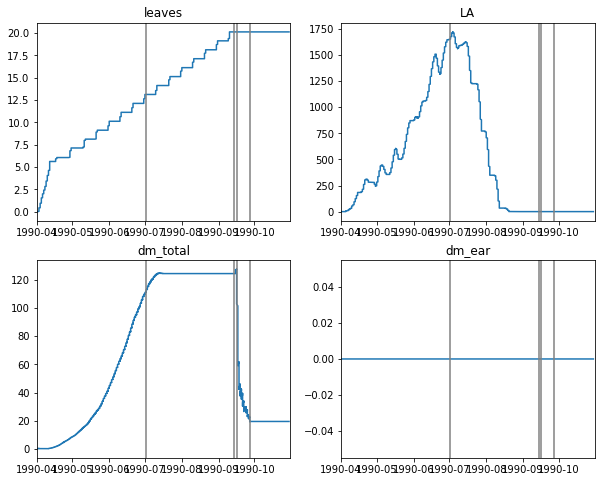

In [150]:
outputs = ['leaves', 'LA', 'dm_total', 'dm_ear']
dates = []
for i in df.index:
    dates.append(datetime.datetime.strptime(i, '%m/%d/%Y'))

fig, axs = plt.subplots(2, 2, figsize=(10,8))
for ax, i in zip(axs.flatten(), outputs):
    ax.plot(dates, df[i])
    ax.set_title(i)
    ax.set_xlim(datetime.datetime(1990,4,1), datetime.datetime(1990,10,31))
    ax.axvline(datetime.datetime(1990,7,2), color='grey') # matured: matured prior to other stages
    ax.axvline(datetime.datetime(1990,9,14), color='grey') # tassel initiation
    ax.axvline(datetime.datetime(1990,9,16), color='grey') # tasseled
    ax.axvline(datetime.datetime(1990,9,27), color='grey') # grain filling